## Importing the Libraries and Dataset



In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Reading the CSV file

df= pd.read_csv(r"D:\Documents\TCR\bank-full.csv")

In [3]:
#Reading the first 10 values

df.head(10)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
5,"35;""management"";""married"";""tertiary"";""no"";231;..."
6,"28;""management"";""single"";""tertiary"";""no"";447;""..."
7,"42;""entrepreneur"";""divorced"";""tertiary"";""yes"";..."
8,"58;""retired"";""married"";""primary"";""no"";121;""yes..."
9,"43;""technician"";""single"";""secondary"";""no"";593;..."


In [4]:
df.shape

(45211, 1)

## Data Cleaning

In [5]:
#Renaming the name of the column using axis method

df.set_axis(['A'], axis='columns', inplace=True)

In [6]:
df.head()

,A
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [7]:
#Defining the name of the columns

columns = ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day','Month','Duration','Campaign', 'Pdays', 'Previous', 'Poutcome', 'Y']

In [8]:
#Renaming and splitting the columns
#Splitting is done based on the semicolon ';'

df[['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day','Month','Duration','Campaign', 'Pdays', 'Previous', 'Poutcome', 'Y']] = df.A.str.split(";",expand=True)

In [9]:
df.head(10)

,A,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506...",47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n...",33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
5,"35;""management"";""married"";""tertiary"";""no"";231;...",35,"""management""","""married""","""tertiary""","""no""",231,"""yes""","""no""","""unknown""",5,"""may""",139,1,-1,0,"""unknown""","""no"""
6,"28;""management"";""single"";""tertiary"";""no"";447;""...",28,"""management""","""single""","""tertiary""","""no""",447,"""yes""","""yes""","""unknown""",5,"""may""",217,1,-1,0,"""unknown""","""no"""
7,"42;""entrepreneur"";""divorced"";""tertiary"";""yes"";...",42,"""entrepreneur""","""divorced""","""tertiary""","""yes""",2,"""yes""","""no""","""unknown""",5,"""may""",380,1,-1,0,"""unknown""","""no"""
8,"58;""retired"";""married"";""primary"";""no"";121;""yes...",58,"""retired""","""married""","""primary""","""no""",121,"""yes""","""no""","""unknown""",5,"""may""",50,1,-1,0,"""unknown""","""no"""
9,"43;""technician"";""single"";""secondary"";""no"";593;...",43,"""technician""","""single""","""secondary""","""no""",593,"""yes""","""no""","""unknown""",5,"""may""",55,1,-1,0,"""unknown""","""no"""


In [10]:
#Removing the column A

df.drop('A', axis=1, inplace=True)

In [11]:
df.head(10)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
5,35,"""management""","""married""","""tertiary""","""no""",231,"""yes""","""no""","""unknown""",5,"""may""",139,1,-1,0,"""unknown""","""no"""
6,28,"""management""","""single""","""tertiary""","""no""",447,"""yes""","""yes""","""unknown""",5,"""may""",217,1,-1,0,"""unknown""","""no"""
7,42,"""entrepreneur""","""divorced""","""tertiary""","""yes""",2,"""yes""","""no""","""unknown""",5,"""may""",380,1,-1,0,"""unknown""","""no"""
8,58,"""retired""","""married""","""primary""","""no""",121,"""yes""","""no""","""unknown""",5,"""may""",50,1,-1,0,"""unknown""","""no"""
9,43,"""technician""","""single""","""secondary""","""no""",593,"""yes""","""no""","""unknown""",5,"""may""",55,1,-1,0,"""unknown""","""no"""


In [12]:
df['Job'].value_counts()

"blue-collar"      9732
"management"       9458
"technician"       7597
"admin."           5171
"services"         4154
"retired"          2264
"self-employed"    1579
"entrepreneur"     1487
"unemployed"       1303
"housemaid"        1240
"student"           938
"unknown"           288
Name: Job, dtype: int64

In [13]:
df['Marital'].value_counts()

"married"     27214
"single"      12790
"divorced"     5207
Name: Marital, dtype: int64

In [14]:
df['Education'].value_counts()

"secondary"    23202
"tertiary"     13301
"primary"       6851
"unknown"       1857
Name: Education, dtype: int64

In [15]:
df['Default'].value_counts()

"no"     44396
"yes"      815
Name: Default, dtype: int64

In [16]:
df['Contact'].value_counts()

"cellular"     29285
"unknown"      13020
"telephone"     2906
Name: Contact, dtype: int64

In [17]:
df['Month'].value_counts()

"may"    13766
"jul"     6895
"aug"     6247
"jun"     5341
"nov"     3970
"apr"     2932
"feb"     2649
"jan"     1403
"oct"      738
"sep"      579
"mar"      477
"dec"      214
Name: Month, dtype: int64

In [18]:
df['Poutcome'].value_counts()

"unknown"    36959
"failure"     4901
"other"       1840
"success"     1511
Name: Poutcome, dtype: int64

In [19]:
df['Duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: Duration, Length: 1573, dtype: int64

In [20]:
#encoding the value of different features.

df.replace({"Education":{'"secondary"':2, '"tertiary"':3, '"primary"':1, '"unknown"':0}}, inplace=True)
df.replace({"Default":{'"no"':0 , '"yes"':1}}, inplace=True)
df.replace({"Loan":{'"no"':0 , '"yes"':1}}, inplace=True)
df.replace({"Housing":{'"no"':0 , '"yes"':1}}, inplace=True)
df.replace({"Y":{'"no"':0 , '"yes"':1}}, inplace=True)
df.replace({"Month":{'"jan"':1, '"feb"':2, '"mar"':3, '"apr"':4, '"may"':5, '"jun"':6, '"jul"':7, '"aug"':8, '"sep"':9, '"oct"':10, '"nov"':11, '"dec"':12}}, inplace=True)
df.replace({"Job":{'"blue-collar"':0, '"management"':1, '"technician"':2, '"admin."':3, '"services"':4, '"retired"':5, '"self-employed"':6, '"entrepreneur"':7, '"unemployed"':8, '"housemaid"':9, '"student"':10, '"unknown"':11}}, inplace=True)
df.replace({"Marital":{'"married"':1, '"single"':2, '"divorced"':0}}, inplace=True)
df.replace({"Contact":{'"cellular"':1, '"telephone"':2, '"unknown"':0}}, inplace=True)
df.replace({"Poutcome":{'"failure"':0, '"success"':1,'"other"':2, '"unknown"':3}}, inplace=True)

In [21]:
df.head(10)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,1,1,3,0,2143,1,0,0,5,5,261,1,-1,0,3,0
1,44,2,2,2,0,29,1,0,0,5,5,151,1,-1,0,3,0
2,33,7,1,2,0,2,1,1,0,5,5,76,1,-1,0,3,0
3,47,0,1,0,0,1506,1,0,0,5,5,92,1,-1,0,3,0
4,33,11,2,0,0,1,0,0,0,5,5,198,1,-1,0,3,0
5,35,1,1,3,0,231,1,0,0,5,5,139,1,-1,0,3,0
6,28,1,2,3,0,447,1,1,0,5,5,217,1,-1,0,3,0
7,42,7,0,3,1,2,1,0,0,5,5,380,1,-1,0,3,0
8,58,5,1,1,0,121,1,0,0,5,5,50,1,-1,0,3,0
9,43,2,2,2,0,593,1,0,0,5,5,55,1,-1,0,3,0


In [22]:
#Converting the objects in to integer type DataFrame

df['Age']=df['Age'].astype('int64')
df['Balance']=df['Balance'].astype('int64')
df['Day']=df['Day'].astype('int64')
df['Duration']=df['Duration'].astype('int64')
df['Campaign']=df['Campaign'].astype('int64')
df['Pdays']=df['Pdays'].astype('int64')
df['Previous']=df['Previous'].astype('int64')

In [23]:
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Y            0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        45211 non-null  int64
 1   Job        45211 non-null  int64
 2   Marital    45211 non-null  int64
 3   Education  45211 non-null  int64
 4   Default    45211 non-null  int64
 5   Balance    45211 non-null  int64
 6   Housing    45211 non-null  int64
 7   Loan       45211 non-null  int64
 8   Contact    45211 non-null  int64
 9   Day        45211 non-null  int64
 10  Month      45211 non-null  int64
 11  Duration   45211 non-null  int64
 12  Campaign   45211 non-null  int64
 13  Pdays      45211 non-null  int64
 14  Previous   45211 non-null  int64
 15  Poutcome   45211 non-null  int64
 16  Y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [25]:
df.describe()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,2.701024,1.167725,2.060516,0.018027,1362.272058,0.555838,0.160226,0.776293,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,2.567251,0.116985
std,10.618762,2.667929,0.608230,0.778704,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.981202,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,2.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,2.000000,1.000000,2.000000,0.000000,448.000000,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,4.000000,2.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [26]:
df.shape

(45211, 17)

In [27]:
df['Y'].value_counts()

0    39922
1     5289
Name: Y, dtype: int64

## Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

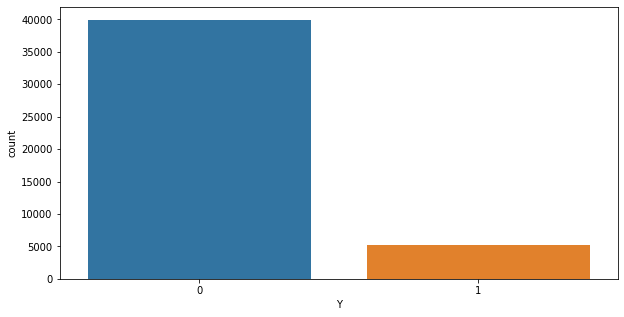

In [28]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Y', data=df)
plt.show

##### Majority of the people did not take the subscription.

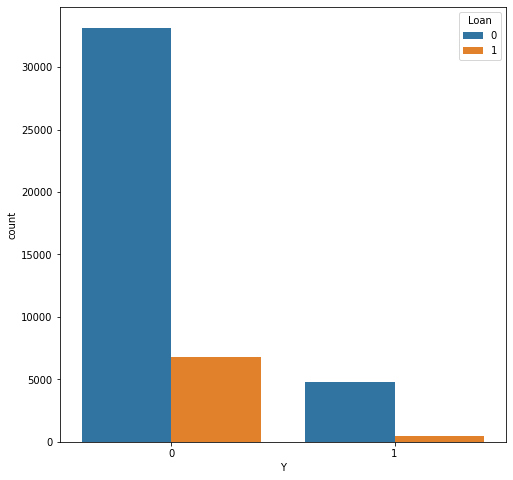

In [29]:
plot=plt.subplots(figsize=(8,8))
plot= sns.countplot(x="Y", hue='Loan', data=df)

##### People who have taken the product subscription are mostly those who dont have any loans.

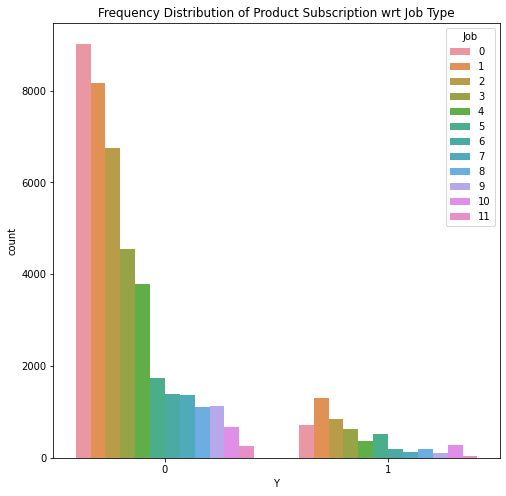

In [30]:
plot=plt.subplots(figsize=(8,8))
plot= sns.countplot(x="Y", hue='Job', data=df)
plt.title("Frequency Distribution of Product Subscription wrt Job Type")
plt.show()

##### People who have taken product subscription are more likely to work either in Job professions like management, Technician, Blue Collar or are retired.

Text(0.5, 1.0, 'Education Qualification')

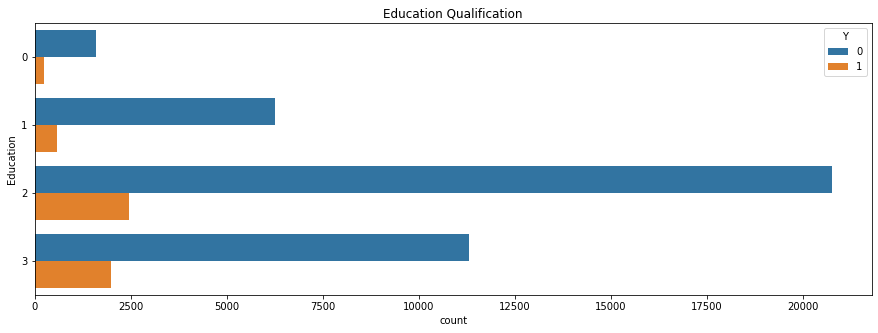

In [31]:
plt.subplots(figsize=(15,5))
sns.countplot( y='Education' ,hue='Y', data=df)
plt.title('Education Qualification')

##### Most of the people who have taken the product subscription have completed their Tertiary & Secondary education.

<function matplotlib.pyplot.show(close=None, block=None)>

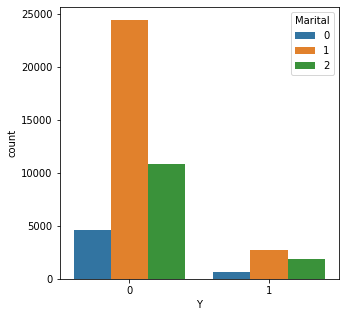

In [32]:
plt.subplots(figsize=(5,5))
sns.countplot(x='Y', hue='Marital', data=df)
plt.show

##### People who are married are more likely to take Product subscription.

<AxesSubplot:>

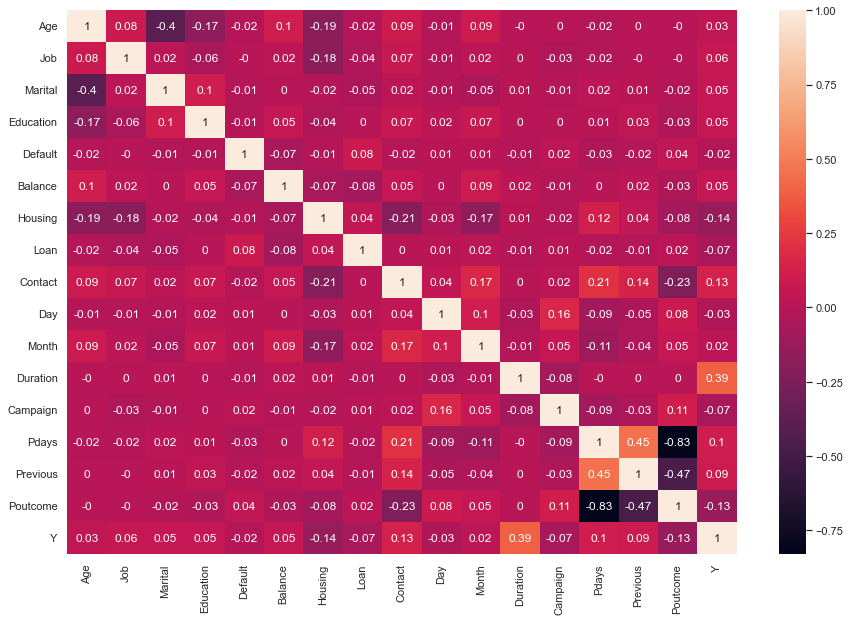

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
correlation_matrix= df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [34]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

## Model Training

In [35]:
X= df.drop(columns=['Y'])
y= df['Y']

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mn= MinMaxScaler()
X= mn.fit_transform(X)

In [38]:
X

array([[0.51948052, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.18181818, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.63636364, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.21215596, 0.01090909,
        0.33333333],
       [0.50649351, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.63636364, 0.5       , ..., 0.21674312, 0.04      ,
        0.66666667]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

## Prediction Using Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gb= GaussianNB()

In [42]:
gb.fit(X_train, y_train)
X_pred = gb.predict(X_train)
X_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
training_data_accuracy= accuracy_score(X_pred, y_train)
print('Accuracy using Naive Bayes for training data is', training_data_accuracy)

Accuracy using Naive Bayes for training data is 0.8267529307675293


In [44]:
test_pred = gb.predict(X_test)
test_data_accuracy = accuracy_score(test_pred, y_test)
print('Accuracy using Naive Bayes for test data is', test_data_accuracy)

Accuracy using Naive Bayes for test data is 0.8138891960632534


## Prediction Using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression()

In [46]:
lr.fit(X_train, y_train)
X_pred = lr.predict(X_train)
X_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
training_data_accuracy= accuracy_score(X_pred, y_train)
print('Accuracy using Logistic Regression for training data is', training_data_accuracy)

Accuracy using Logistic Regression for training data is 0.8912298164122981


In [48]:
test_pred = lr.predict(X_test)
test_data_accuracy = accuracy_score(test_pred, y_test)
print('Accuracy using Logistic Regression for test data is', test_data_accuracy)

Accuracy using Logistic Regression for test data is 0.8866526595156474


## Prediction Using SVM

In [49]:
from sklearn import svm
from sklearn.metrics import accuracy_score
sv= svm.SVC()
sv.fit(X_train, y_train)

SVC()

In [50]:
X_pred = sv.predict(X_train)
X_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
training_data_accuracy= accuracy_score(X_pred, y_train)
print('Accuracy using SVM for training data is', training_data_accuracy)

Accuracy using SVM for training data is 0.8935246626852467


In [52]:
test_pred = sv.predict(X_test)
test_data_accuracy= accuracy_score(test_pred, y_test)
print('Accuracy using SVM for testing data is', test_data_accuracy)

Accuracy using SVM for testing data is 0.8880902355413026


In [ ]:
plt.scatter(x=X_pred)